## **Forum statistics for nyuclass**
Created on: Sept. 18th, 2020  
Author: Hammond Liu  
License: GPL v3.0



In [58]:
# Mount the drive to this program
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [59]:
# Change the path
from os import chdir, listdir
print(listdir())
chdir('/content/gdrive/My Drive/Python')
print(listdir())

['Programming for DS', 'soup.html', 'forum_analysis.ipynb']
['Programming for DS', 'soup.html', 'forum_analysis.ipynb']


In [61]:
# Fetch the posts from the html code
from bs4 import BeautifulSoup
soup = BeautifulSoup(open("soup.html", 'r', encoding='utf-8').read())
items = soup.find_all(class_="bogus")
print('Num of posts:', len(items))

for i in range(min(len(items), 10)):
    t = items[i]
    print(t.getText()[:50])

Num of posts: 57
Siegel and Shuster, "Superman"Ezra Claverie (sec12
Re: Siegel and Shuster, "Superman" Xinhao Liu (xl3
On Superman's BackgroundYanyao Zhang (yz6197) (Sep
Re: On Superman's Background Xinhao Liu (xl3136) (
Re: On Superman's Background Yanyao Zhang (yz6197)
 New!Re: Siegel and Shuster, "Superman" Yu Zheng (
This message has been deleted
Re: Siegel and Shuster, "Superman" Yanyao Zhang (y
Re: Siegel and Shuster, "Superman" Xinhao Liu (xl3
Re: Siegel and Shuster, "Superman" Hammond Liu (hl


In [62]:
# Initialize variables
count = 0
basic_info = []
content_info = []

# Extract information
for i in range(len(items)):
    t = items[i]
    try:
        # time = t.find(class_='textPanelFooter md').getText()
        time = t.div.div.span.getText().strip(' ()')
        name = t.div.div.a.getText()
        # print(name)
        content = t.div.div.next_sibling.getText().replace('  ', ' ').strip()
        # print(content[-20:])
        word_count = len(content.split())

        info = (name, time, word_count)
        basic_info.append(info)
        content_info.append(content)
    except:
        # Handle unexpected data
        count += 1
        continue
    # break
print('Num of invalid posts:', count, '(Usually deleted)')
print(basic_info)

Num of invalid posts: 2 (Usually deleted)
[('Ezra Claverie (sec12)', 'Sep 17, 2020 11:44 AM', 117), ('Xinhao Liu (xl3136)', 'Sep 17, 2020 12:12 PM', 241), ('Yanyao Zhang (yz6197)', 'Sep 17, 2020 2:48 PM', 108), ('Xinhao Liu (xl3136)', 'Sep 17, 2020 3:49 PM', 85), ('Yanyao Zhang (yz6197)', 'Sep 17, 2020 5:10 PM', 28), ('Yu Zheng (yz6208)', 'Sep 17, 2020 3:51 PM', 86), ('Yanyao Zhang (yz6197)', 'Sep 17, 2020 12:24 PM', 202), ('Xinhao Liu (xl3136)', 'Sep 17, 2020 3:46 PM', 173), ('Hammond Liu (hl3797)', 'Sep 17, 2020 2:34 PM', 246), ('Ezra Claverie (sec12)', 'Sep 17, 2020 3:41 PM', 90), ('Hammond Liu (hl3797)', 'Sep 17, 2020 3:51 PM', 4), ('Zhiyang Wang (zw2376)', 'Sep 17, 2020 3:42 PM', 147), ('Yu Zheng (yz6208)', 'Sep 17, 2020 3:43 PM', 146), ('Ezra Claverie (sec12)', 'Sep 17, 2020 4:10 PM', 94), ('Zhiyang Wang (zw2376)', 'Sep 17, 2020 4:11 PM', 83), ('Jack Lu shan (sl7766)', 'Sep 18, 2020 1:47 PM', 118), ('Chaoyi Wang (cw3322)', 'Sep 17, 2020 5:09 PM', 63), ('Hammond Liu (hl3797)', 'Se

In [64]:
def print_result(info, res):
    print(info)
    for i in res:
        print('%s %s posts %s words' % (i[0].ljust(28), str(i[1]).rjust(8), str(i[2]).rjust(12)))
    print('\n')

In [65]:
rank_posts = {}
rank_words = {}
# rank_time = {}
for i in basic_info:
    rank_posts[i[0]] = rank_posts.get(i[0], 0) + 1
    rank_words[i[0]] = rank_words.get(i[0], 0) + i[2]
    # rank_time[i[0]] = rank_time.get(i[0], []) + [i[1]]

rank_result = []
for i in rank_posts:
    rank_result.append((i, rank_posts[i], rank_words[i]))

rank_result.sort(key=lambda x:x[1], reverse=True)
print_result('Index: num of posts', rank_result)

rank_result.sort(key=lambda x:x[2], reverse=True)
print_result('Index: word count', rank_result)

Index: num of posts
Ezra Claverie (sec12)              10 posts          876 words
Yanyao Zhang (yz6197)               8 posts          757 words
Hammond Liu (hl3797)                8 posts          780 words
Jack Lu shan (sl7766)               7 posts         1118 words
Yu Zheng (yz6208)                   6 posts          682 words
Xinhao Liu (xl3136)                 5 posts          880 words
Zhiyang Wang (zw2376)               4 posts          425 words
Chaoyi Wang (cw3322)                4 posts          401 words
Emily Wright (elw396)               3 posts          282 words


Index: word count
Jack Lu shan (sl7766)               7 posts         1118 words
Xinhao Liu (xl3136)                 5 posts          880 words
Ezra Claverie (sec12)              10 posts          876 words
Hammond Liu (hl3797)                8 posts          780 words
Yanyao Zhang (yz6197)               8 posts          757 words
Yu Zheng (yz6208)                   6 posts          682 words
Zhiyang Wang (z

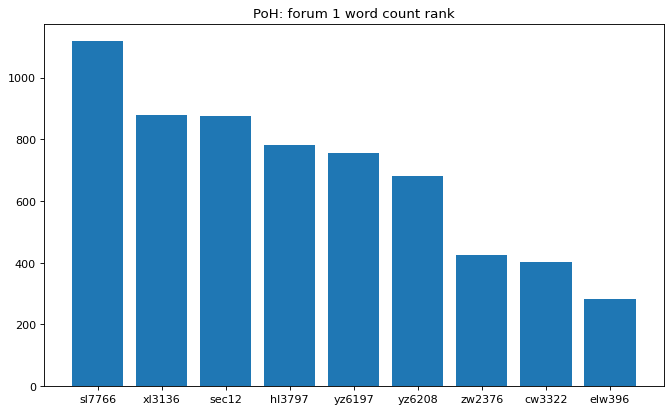

In [66]:
# Visualize the data
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6), dpi=80)
plt.title('PoH: forum 1 word count rank')
plt.bar([i[0][i[0].find('(')+1:i[0].find(')')] for i in rank_result], [i[2] for i in rank_result])
plt.show()